In [1]:
#Line Graph of Change in Cost over time

SyntaxError: invalid syntax (<ipython-input-1-8f3a1da9f74b>, line 1)

In [ ]:
#Read in the CSV and do ananlysis maybe add all the years

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
damage_2020 = pd.read_csv('2000_damage.csv') # from Wind_Speed.ipynb
damage_2020

In [2]:
# import pandas as pd
# import os
# import glob

# csv_directory = ""

# # Get a list of all CSV files matching the pattern
# csv_files = glob.glob(os.path.join(csv_directory, "*_damage.csv"))

# # Initialize an empty list to hold dataframes
# dataframes = []

# for file in csv_files:
#     # Extract the year from the filename (e.g., '2000' from '2000_damage.csv')
#     basename = os.path.basename(file)
#     year = basename.split("_")[0]

#     # Read the CSV file into a DataFrame
#     df = pd.read_csv(file)

#     # Append the year to each column name
#     df = df.add_prefix(f"{year}_")

#     # Add the dataframe to the list
#     dataframes.append(df)
#     # Concatenate all dataframes along columns (axis=1)
# final_dataframe = pd.concat(dataframes, axis=1)

# # Display the final dataframe
# print(final_dataframe)

# # Optionally, save the final dataframe to a new CSV file
# final_dataframe.to_csv("combined_damage_data.csv", index=False)

In [ ]:
import pandas as pd
import os
import glob

# Directory where your CSV files are located
csv_directory = ""

# Get a list of all CSV files matching the pattern
csv_files = glob.glob(os.path.join(csv_directory, "*_damage.csv"))

# Initialize an empty list to hold dataframes
dataframes = []

for file in csv_files:
    # Extract the year from the filename (e.g., '2000' from '2000_damage.csv')
    basename = os.path.basename(file)
    year = basename.split("_")[0]

    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)

    # Append the year to each column name
    df = df.add_prefix(f"{year}_")

    # Add the dataframe to the list
    dataframes.append(df)

# Concatenate all dataframes along columns (axis=1)
final_dataframe = pd.concat(dataframes, axis=1)

# Display the final dataframe
#print(final_dataframe)

# Optionally, save the final dataframe to a new CSV file
# final_dataframe.to_csv("combined_data.csv", index=False)

# Create dataframes based on column name patterns
area_damaged_all_df = final_dataframe.filter(regex="_area_damaged_all$").copy()
area_damaged_ll_df = final_dataframe.filter(regex="_area_damaged_ll$").copy()
area_damaged_open_space_df = final_dataframe.filter(regex="_area_damaged_open_space$").copy()

# Include the 2020_CountyName column in all three dataframes
if "2020_CountyName" in final_dataframe.columns:
    area_damaged_all_df["2020_CountyName"] = final_dataframe["2020_CountyName"]
    area_damaged_ll_df["2020_CountyName"] = final_dataframe["2020_CountyName"]
    area_damaged_open_space_df["2020_CountyName"] = final_dataframe["2020_CountyName"]

# Display the new dataframes
# print("DataFrame with columns ending in '_area_damaged_all':")
print(area_damaged_all_df)

# print("DataFrame with columns ending in '_area_damaged_ll':")
# print(area_damaged_ll_df)

# print("DataFrame with columns ending in '_area_damaged_open_space':")
# print(area_damaged_open_space_df)

# Optionally, save these dataframes to separate CSV files
area_damaged_all_df.to_csv("area_damaged_all.csv", index=False)
# area_damaged_ll_df.to_csv("area_damaged_ll.csv", index=False)
# area_damaged_open_space_df.to_csv("area_damaged_open_space.csv", index=False)


In [ ]:
# print("DataFrame with columns ending in '_area_damaged_all':")
area_damaged_all_df.columns = [col.replace("_area_damaged_all", "") for col in area_damaged_all_df.columns]
area_damaged_all_df.columns = [col.replace("2020_", "") for col in area_damaged_all_df.columns]
area_damaged_all_df['total'] = area_damaged_all_df.drop(columns=['CountyName']).sum(axis=1)
print(area_damaged_all_df)

# print("DataFrame with columns ending in '_area_damaged_ll':")
# print(area_damaged_ll_df)

# area_damaged_open_space_df.columns = [col.replace("_area_damaged_open_space_", "") for col in area_damaged_open_space_df.columns]
# area_damaged_open_space_df.columns = [col.replace("2020_", "") for col in area_damaged_open_space_df.columns]
# area_damaged_open_space_df['total'] = area_damaged_open_space_df.drop(columns=['CountyName']).sum(axis=1)

# print(area_damaged_open_space_df)

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame structure (replace this with your actual DataFrame)

df = area_damaged_all_df

# Select the top 10 counties by total values
top_10 = df.nlargest(10, 'total')

top_10 

,2020,2010,2017,2008,2006,2016,2000,2002,2009,2007,...,2018,2013,2015,2014,2001,2005,2011,2003,CountyName,total
57,23.778415,23.778415,4.748824,23.778415,23.778415,49.203088,49.203088,11.097737,36.493390,15.855135,...,4.748824,15.855135,36.493390,4.748824,11.097737,11.097737,11.097737,23.778415,Haywood,420.257691
88,15.584481,15.584481,6.668742,6.668742,2.222914,2.222914,0.111146,6.668742,0.033344,33.391876,...,0.044458,15.584481,15.584481,0.033344,0.111146,114.480079,2.222914,15.584481,Watauga,299.556207
56,21.813251,6.633468,9.477114,29.410239,14.213109,29.410239,6.633468,0.047309,9.477114,6.633468,...,6.633468,9.477114,14.213109,2.838522,0.946174,2.838522,2.838522,6.633468,Graham,194.380786
74,0.036024,2.401579,0.120079,0.048032,0.120079,0.036024,0.120079,0.120079,0.000000,24.054815,...,0.036024,0.120079,16.837070,0.036024,0.048032,99.065132,0.036024,2.401579,Caldwell,155.279090
79,0.076050,1.521000,0.022815,0.015210,0.030420,0.015210,0.015210,0.022815,0.030420,35.065387,...,0.022815,0.030420,0.076050,0.022815,10.663477,35.065387,0.022815,1.521000,Avery,95.009265
60,3.238450,0.161923,0.064769,0.048577,0.048577,0.161923,0.032385,0.048577,0.048577,22.704234,...,0.064769,0.048577,0.064769,0.161923,9.715350,32.437126,0.048577,0.161923,Buncombe,72.709951
72,23.887705,0.768505,0.768505,0.768505,2.305516,2.305516,0.015370,0.015370,0.768505,17.717248,...,0.768505,0.768505,0.038425,0.038425,2.305516,5.387862,0.768505,2.305516,Yancey,70.163890
99,0.038957,13.655995,0.000000,0.019478,0.029218,0.019478,0.038957,0.097392,0.000000,44.905872,...,0.097392,0.029218,0.019478,0.038957,0.019478,0.097392,0.019478,0.038957,Alleghany,59.272829
9,0.015534,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.077668,0.000000,0.000000,0.000000,0.000000,23.334082,0.000000,0.000000,New Hanover,46.761365
54,0.004750,0.000000,0.000000,0.237502,0.000000,3.567670,0.000000,0.003563,0.000000,0.000000,...,0.002375,0.000000,0.000000,0.002375,0.000000,12.231334,3.567670,18.792811,Dare,41.977720


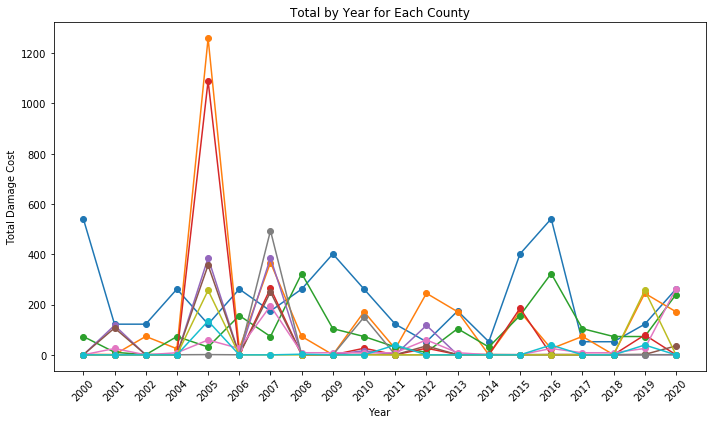

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

df = top_10
df.loc[:, df.columns != 'county_name'] *= 11
# Extract the year columns (excluding 'CountyName' and 'Total')
years = df.columns[:-3]  # These are the years, which are column names
# Sort the years in chronological order
sorted_years = sorted(years, key=int)

# Plotting the data for each county
plt.figure(figsize=(10, 6))

for idx, row in df.iterrows():
    county_name = row['CountyName']
    totals = row[sorted_years]  # Select the year-wise data in sorted order
    plt.plot(sorted_years, totals, marker='o', label=county_name)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Damage Cost')
plt.title('Total by Year for Each County')

# Rotate the year labels for better readability
plt.xticks(rotation=45)

# Display the legend
#plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [78]:
top_10.to_csv("combined_damage_data_top_10.csv", index=False) 

In [72]:
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes

county_data = {
    'CountyName': ['New Hanover', 'Dare', 'Graham', 'Haywood', 'Buncombe', 'Yancey', 'Caldwell', 'Avery', 'Watauga', 'Alleghany'],
    'Color': ['lightgreen', 'lightblue', 'green', 'blue', 'brown', 'pink', 'red', 'purple', 'orange', 'grey']
}
county_data = pd.DataFrame(county_data)
# Step 1: Read the shapefile into a GeoDataFrame
shapefile = "/data/HW/HW2/NCDOT_County_Boundaries.shp"  # Replace with the path to your shapefile
gdf = gpd.read_file(shapefile)
gdf_boundaries = gpd.read_file(shapefile)

gdf = gdf.merge(top_10, left_on='CountyName', right_on='CountyName', how='right')
gdf = gdf.merge(county_data, left_on='CountyName', right_on='CountyName', how='right')


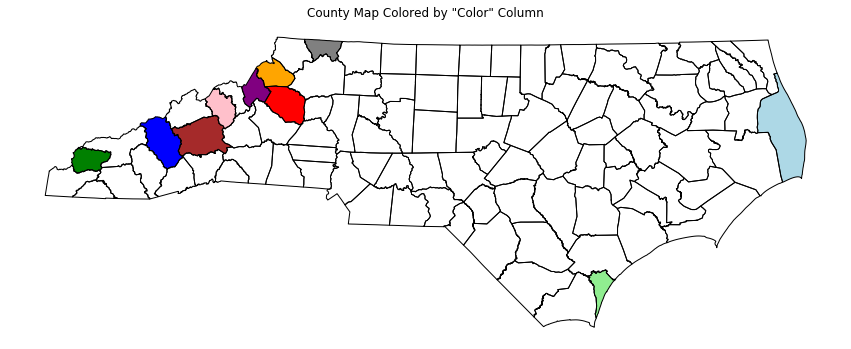

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the counties, coloring by the 'Color' column in your DataFrame
gdf.plot(ax=ax, color=gdf['Color'], legend=True)
gdf_boundaries.boundary.plot(ax=ax, color='black', linewidth=1)
# Optional: Add title and remove axis for better visualization
ax.set_title('County Map Colored by "Color" Column')
ax.set_axis_off()

# Show the map
plt.show()